 ## Final Assignment Template - Earth Analytics Bootcamp
 
 The assignment repo for this week contains a `README.md` file with 
 instructions to complete your final assignment. Follow those 
 instructions closely!

In [340]:
# Core imports needed for grading - DO NOT MODIFY THIS CELL
from glob import glob
import os

import hydrofunctions as hf
import earthpy as et
import seaborn as sns
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import folium
import matplotcheck.notebook as nb
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag
import numpy as np

# We are adding this for you as there is a bug in hydrofunctions that
# Turns off plotting
%matplotlib inline

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")


## Get set up to complete your assignment
Add cells below to import packages, get data and set your working directory

**IMPORTANT: Be sure to set your working directory to `earth-analytics/data`**

## Define Function 1 - For Figure 1 (10 points)

Create a function that opens up a single `.csv` file containing precipitation data  required  for figure 1
* It should then  subset the data to the year range 1989-2018, summarize the data to 
* Calculate monthly TOTAL (sum) precipitation 
* To simplify your code below, add a new column to your data with the site name 
    * (sf or boulder derived from the file name) 

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
from glob import glob
import earthpy as et
import pandas as pd

In [342]:
precip_url = "https://ndownloader.figshare.com/files/25564340"
data_path = et.data.get_data(url = precip_url)

In [343]:
# Define your function here using a numpy style doc-string
def create_path(city):
    path = os.path.join(
        data_path,
        city+"-daily-precip-1948-2018.csv"
    )
    return(path)

def open_df_daily_to_monthly(city):
    data = pd.read_csv(
        create_path(city),
        parse_dates = ['DATE'],
        index_col = ['DATE'],
    )
    data = (data
    .loc['1989':'2018', ["PRCP"]]
    .resample('M').sum()
    )

    data['MONTH'] = data.index.month
    data['CITY'] = city

    return(data)
    

In [344]:
df_sf = open_df_daily_to_monthly("sf")
df_bo = open_df_daily_to_monthly("boulder")

df = pd.concat([df_sf, df_bo])
df

,PRCP,MONTH,CITY
DATE,,,
1989-01-31,1.26,1,sf
1989-02-28,1.49,2,sf
1989-03-31,5.28,3,sf
1989-04-30,0.70,4,sf
1989-05-31,0.06,5,sf
...,...,...,...
2018-08-31,0.24,8,boulder
2018-09-30,1.02,9,boulder
2018-10-31,2.68,10,boulder


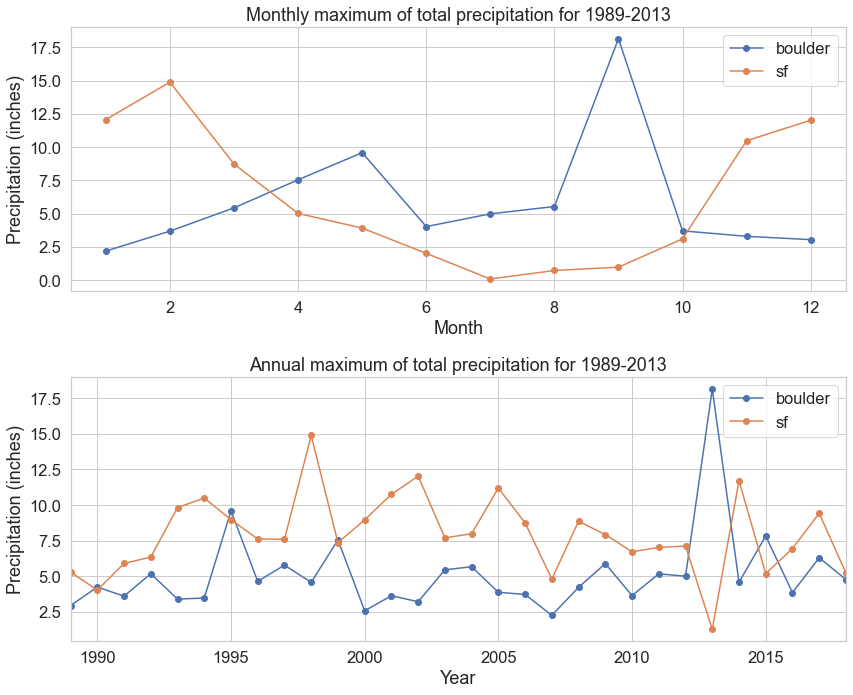

In [345]:
# In this cell place only the code to create the figure 1 plot.
# Add cells above this cell to process your data. Add a markdown cell that describes
# what the plots below show - be sure to include a header in your markdown cell
# Remember that you will have a total of 12 values for the first subplot - one for each month.
# The max precipitation value for Jan, Feb, March, and so on.
# The second plot should have a single value for each year

# Add Your Plot Code Here
# Add any cells above that you need to process your data
# If your plot is not in this cell, the autograder won't run
# You can tell that your plot is in the right cell if the 
# checks that your plot is a line plot pass

# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

for key, grp in df.groupby(['CITY']):
    grp = grp.groupby(['MONTH']).max()
    grp.plot(ax=ax1, kind="line", marker="o", y='PRCP', label=key)

ax1.legend(loc='upper right')
ax1.set(xlabel = "Month", ylabel = "Precipitation (inches)")
ax1.set_title("Monthly maximum of total precipitation for 1989-2013")

for key, grp in df.groupby(['CITY']):
    grp = grp.resample('Y').max()
    grp.plot(ax=ax2, kind="line", marker="o", y='PRCP', label=key)

ax2.legend(loc='upper right')
ax2.set(xlabel = "Year", ylabel = "Precipitation (inches)")
ax2.set_title("Annual maximum of total precipitation for 1989-2013")

plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
boulder_san_fran_plot = nb.convert_axes(plt, which_axes="all")

In [346]:
# DO NOT MODIFY THIS CELL
# Make sure that the cell above this is the cell where you create your plot!

# Tests to ensure your plot is being read by the autograder.

monthly_median = PlotTester(boulder_san_fran_plot[0])
annual_maximum = PlotTester(boulder_san_fran_plot[1])

test_plot_1_top_type = ag.run_test(monthly_median.assert_plot_type,
                                   plot_type="line",
                                   points=0,
                                   correct_message="\u2705 Your top plot is being found by the autograder and is a line plot!",
                                   error_message="\u274C Your top plot is either not being found by the autograder or is not a line plot.")


test_plot_1_bottom_type = ag.run_test(annual_maximum.assert_plot_type,
                                      plot_type="line",
                                      points=0,
                                      correct_message="\u2705 Your bottom plot is being found by the autograder and is a line plot!",
                                      error_message="\u274C Your bottom plot is either not being found by the autograder or is not a line plot.")

print(test_plot_1_top_type["message"])

print(test_plot_1_bottom_type["message"])


✅ Your top plot is being found by the autograder and is a line plot!
✅ Your bottom plot is being found by the autograder and is a line plot!


In [347]:
# DO NOT MODIFY THIS CELL

### Manual Grade for Plot 1

- Plots have appropriate titles
- Plots have appropriate x and y labels
- Each line is a unique color
- Legend has appropriate key words and is displayed correctly

## Figure 2: Stream Discharge For 2013 Colorado Floods

Create a figure containing stream discharge data for the time period:
`start='1990-01-01', end='2018-12-31'` and for the sites `"06730500", "09105000", "07106300", "07126390"`. Automate your workflow
using loops and a function which processes data for each site and adds the data to a DataFrame.
Add as many cells as you want below to process your data.  But be sure to add your plot code to
the cell that says "Add Your Plot Code Here". If the tests checking that your plots are line plots 
don't run, then the autograder won't run either. 

HINT: You can adjust the legend location and font size using:
`plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})`

## Define Function 2 - For Figure 2

Create a function that takes in a NWIS site number (i.e. '06730500'), a start date, and an end date, and returns a dataframe with the information from the site, including the sites name, latitude, and longitude as columns added into the dataframe hydrofunctions returns.

* Use `hf.NWIS(params)` to get a response from the NWIS website
* Use `response.df()` to get a dataframe from the NWIS response you got
* Use `hf.get_nwis_property(response, property)[0]` to get information about the site you're plotting. `"siteName"` will return the site's name, and `"geoLocation"` will return a dictionary containing the latitude and longitude. Make sure to add the name, latitude, and longitude as new columns in the dataframe for your output!

In [348]:
# In this cell create a function to support figure one that opens
# data using hydrofunctions and returns a dataframe  with
# x,y location, site name and discharge data

def create_df(site, start, end):
    resp = hf.get_nwis(
        site=site, 
        start_date="1989-01-01", 
        end_date="2018-12-31",
        parameterCd='00060'
    )
    df, meta = hf.extract_nwis_df(resp)
    df['siteName'] = hf.get_nwis_property(resp.json(), "siteName")[0]
    df['long'] = hf.get_nwis_property(resp.json(), key='geoLocation')[0]['geogLocation']['longitude']
    df['lat'] = hf.get_nwis_property(resp.json(), key='geoLocation')[0]['geogLocation']['latitude']
    df = df.iloc[:, [0, 2, 3, 4]]
    df = df.rename(columns = {df.columns[0]:"discharge"})
    return(df)

In [349]:
start='1990-01-01'
end='2018-12-31'
sitenumbers = ["06730500", "09105000", "07106300", "07126390"]

In [350]:
df = []
for n in sitenumbers:
    mydf = create_df(n, start, end)
    df.append(mydf)
df = pd.concat(df)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&parameterCd=00060&startDT=1989-01-01&endDT=2018-12-31
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=09105000&parameterCd=00060&startDT=1989-01-01&endDT=2018-12-31
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07106300&parameterCd=00060&startDT=1989-01-01&endDT=2018-12-31
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07126390&parameterCd=00060&startDT=1989-01-01&endDT=2018-12-31


In [351]:
df

,discharge,siteName,long,lat
datetimeUTC,,,,
1989-01-01 00:00:00+00:00,86.0,"BOULDER CREEK AT MOUTH NEAR LONGMONT, CO",-105.020222,40.138778
1989-01-02 00:00:00+00:00,94.0,"BOULDER CREEK AT MOUTH NEAR LONGMONT, CO",-105.020222,40.138778
1989-01-03 00:00:00+00:00,110.0,"BOULDER CREEK AT MOUTH NEAR LONGMONT, CO",-105.020222,40.138778
1989-01-04 00:00:00+00:00,94.0,"BOULDER CREEK AT MOUTH NEAR LONGMONT, CO",-105.020222,40.138778
1989-01-05 00:00:00+00:00,82.0,"BOULDER CREEK AT MOUTH NEAR LONGMONT, CO",-105.020222,40.138778
...,...,...,...,...
2018-10-27 00:00:00+00:00,0.0,"LOCKWOOD CANYON CREEK NEAR THATCHER, CO",-103.828011,37.492793
2018-10-28 00:00:00+00:00,0.0,"LOCKWOOD CANYON CREEK NEAR THATCHER, CO",-103.828011,37.492793
2018-10-29 00:00:00+00:00,0.0,"LOCKWOOD CANYON CREEK NEAR THATCHER, CO",-103.828011,37.492793


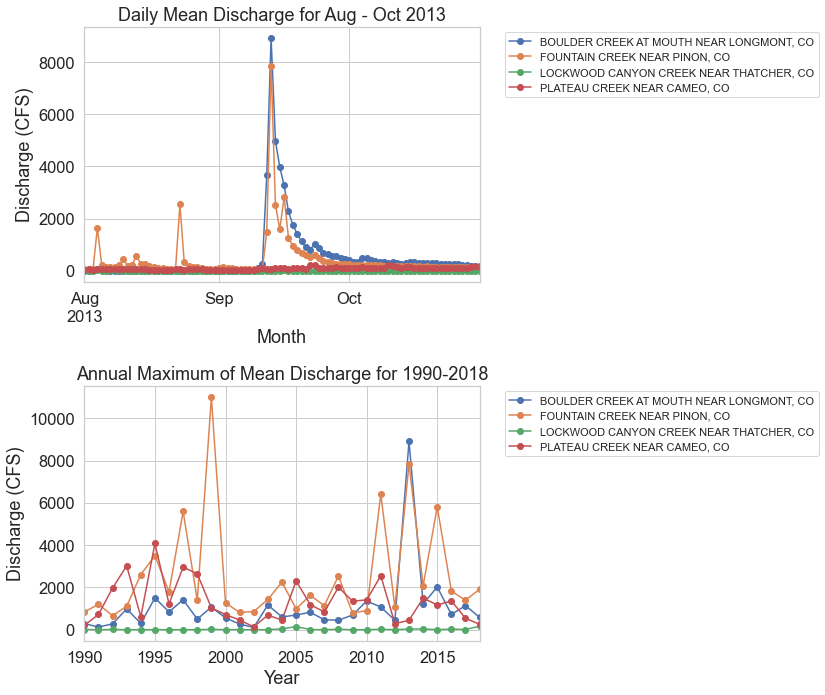

In [352]:
# Add Your Plot Code Here
# Add any cells above that you need to process your data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

for key, grp in df.groupby(['siteName']):
    grp = grp.loc["2013-08-01":"2013-10-31", :]
    grp = grp.resample('D').mean()
    grp.plot(ax=ax1, kind="line", marker="o", y='discharge', label=key)

# ax1.legend(loc='upper right')
ax1.set(xlabel = "Month", ylabel = "Discharge (CFS)")
ax1.set_title("Daily Mean Discharge for Aug - Oct 2013")
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

for key, grp in df.groupby(['siteName']):
    grp = grp.loc["1990":"2018", :]
    grp = grp.resample('A').max()
    grp.plot(ax=ax2, kind="line", marker="o", y='discharge', label=key)

# ax2.legend(loc='upper right')
ax2.set(xlabel = "Year", ylabel = "Discharge (CFS)")
ax2.set_title("Annual Maximum of Mean Discharge for 1990-2018")
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
co_streams_plot = nb.convert_axes(plt, which_axes="all")

In [353]:
# DO NOT MODIFY THIS CELL

daily_mean = PlotTester(co_streams_plot[0])
annual_maximum_2 = PlotTester(co_streams_plot[1])

test_plot_2_top_type = ag.run_test(daily_mean.assert_plot_type,
                                   plot_type="line",
                                   points=0,
                                   correct_message="\u2705 Your top plot is being found by the autograder and is a line plot!",
                                   error_message="\u274C Your top plot is either not being found by the autograder or is not a line plot.")


test_plot_2_bottom_type = ag.run_test(annual_maximum_2.assert_plot_type,
                                      plot_type="line",
                                      points=0,
                                      correct_message="\u2705 Your bottom plot is being found by the autograder and is a line plot!",
                                      error_message="\u274C Your bottom plot is either not being found by the autograder or is not a line plot.")

print(test_plot_2_top_type["message"])

print(test_plot_2_bottom_type["message"])


✅ Your top plot is being found by the autograder and is a line plot!
✅ Your bottom plot is being found by the autograder and is a line plot!


In [354]:
# DO NOT MODIFY THIS CELL

### Manual Grading for Plot 2

- Plots have appropriate titles
- Plots have appropriate x and y labels
- Each line is a unique color
- Legend has appropriate key words and is displayed correctly

## Figure 3: Stream Gage Locations Interactive Map

Create an interactive `folium` that shows the 4 stream gage locations that 
you downloaded data for above. BONUS: Add a popup to the map with the 
gage site name in it.

You can use the code below to get a start on creating the interactive map.

```
m = folium.Map(location=[39.0150, -105.2705],
               tiles='Stamen Terrain',
               zoom_start=7)


for name, xy in gages_dataframe_name_here.groupby(["name_column"]):
    folium.Marker(
        location=[xy.lat[0], xy.long[0]],
        popup=name, 
        icon=folium.Icon()
    ).add_to(m)
```

In [355]:
# Add your code to create a folium map here
m = folium.Map(location=[39.0150, -105.2705],
               tiles='Stamen Terrain',
               zoom_start=7)

for name, xy in df.groupby(["siteName"]):
    folium.Marker(
        location=[xy.lat[0], xy.long[0]],
        popup=name, 
        icon=folium.Icon()
    ).add_to(m)

m

## Manual Grade: Folium Stream Gage Location Plot

* Interactive folium map is created above with a basemap of the students choice (10 points)
* Plot contains 4 stream gage locations in the correct place (10 points)
* BONUS: Plot contains a popup box with the site name in it (5 points)

NOTE: just in case you were wondering... the USGS  does spell stream gage (**gage** not **guage**).
We follow their spelling lead in our assignments and lessons.

## Manual Grade: Clean Code Requirements (30 points)
In this cell, we will give you points for the following

* Notebook uses loops and functions to make code more efficient and clean
  * Notebook uses loops to plot rather than manually creating each axis 
* Notebook uses DRY approaches (don't repeat yourself) to avoid "copy pasta" style repetitive code


## Manual Grade: Markdown Cells Are Used to Organization Code

* Markdown cells are used to organize code (5)
* Patterns observed in each figure are described in a markdown cell below that figure (15)

## Manual Grade: Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook 
2. Spelling and grammar are considered in your written responses above
3. The notebook runs from top to bottom without any editing (it is reproducible)